# Pruebas con las funciones principales del código

## Importación de librería

In [2]:
from polynomial_preprocessing import procesamiento_datos_continuos, procesamiento_datos_grillados, preprocesamiento_datos_a_grillar
from polynomial_preprocessing.optimization import optimizacion_parametros_continuos, optimizacion_parametros_grillados
from polynomial_preprocessing.image_synthesis import conjugate_gradient
import numpy as np
from scipy.interpolate import griddata
from astropy.io import fits
from matplotlib import pyplot as plt

## Ejemplo de uso de optimización de parametros:

In [ ]:
ejemplo_opti_dc = optimizacion_parametros_continuos.OptimizacionParametrosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits",
    "/home/stephan/polynomial_preprocessing/datasets/HD142/hd142_b9cont_self_tav.ms",  
	[10, 24],
	[1e-3, 1e-1],
	0.0007310213536,
	251)

ejemplo_opti_dc.initialize_optimization(100)

## Ejemplo de uso del procesamiento de datos continuos con los parametros óptimos encontrados anteriormente:

8.144757559555597e-08 rad
1.163536794222228e-08 rad


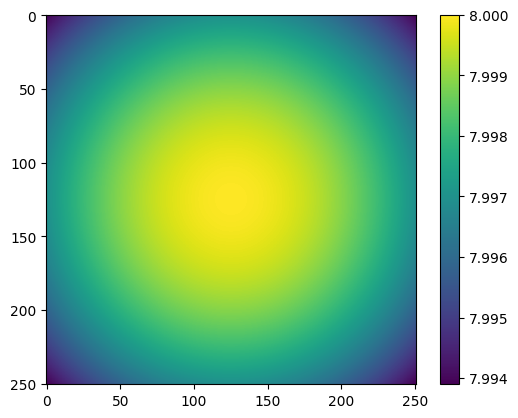

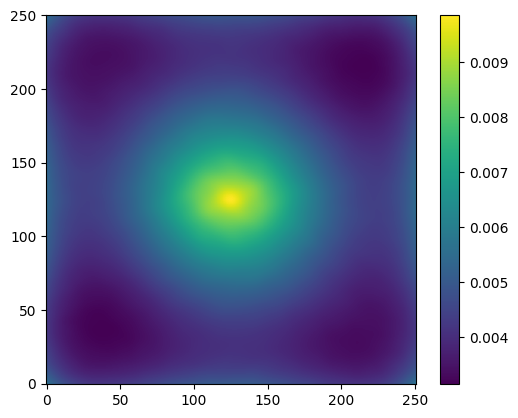

gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (1.3167353691572625e-05-1.9058241313221758e-21j)
MIN FINAL: (-5.097063329642803e-05+2.9990761691962767e-05j)


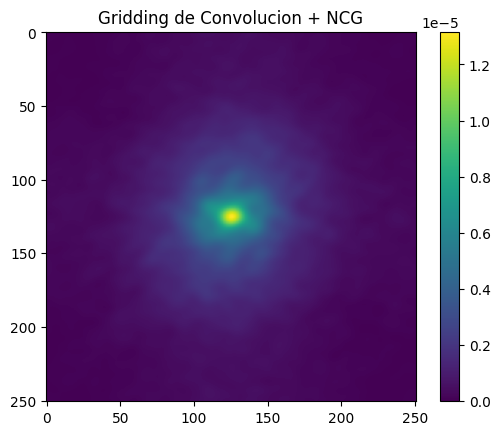

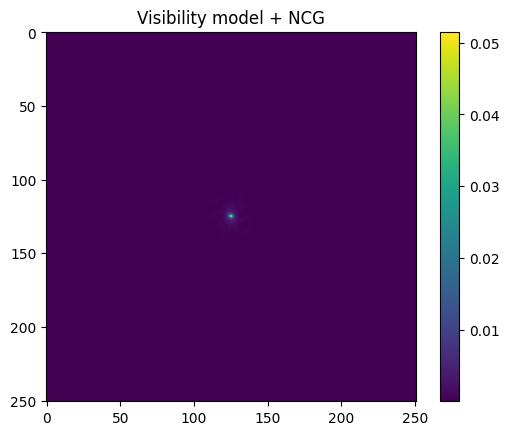

In [17]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms",
    251
)

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [12]:
ejemplo1_gwlup_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms", 
	15, 
    0.09857146145074052,
    1.163536794222228e-08,
    313,
    verbose = False,
    plots = True
)


self.pixel_size:  2.163536794222228e-08
self.image_size:  513
8.144757559555597e-08 rad
1.163536794222228e-08 rad


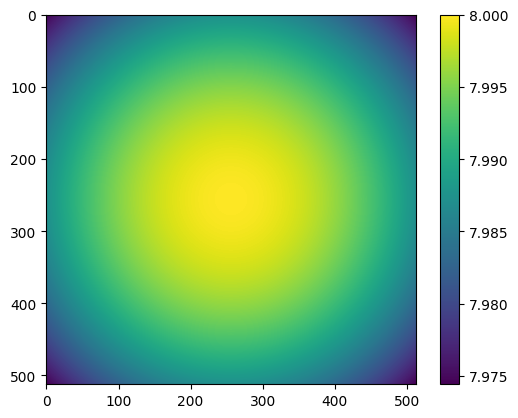

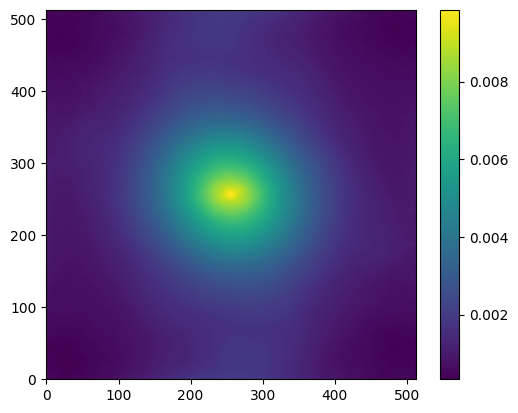

dx a entregar:  1.163536794222228e-08 rad


In [4]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_gwlup_grid.grid_data()

gw_sparse.shape:  (8423,)
u_sparse:  (8423,)
v_sparse:  (8423,)
z_sparse.shape:  (8423,)


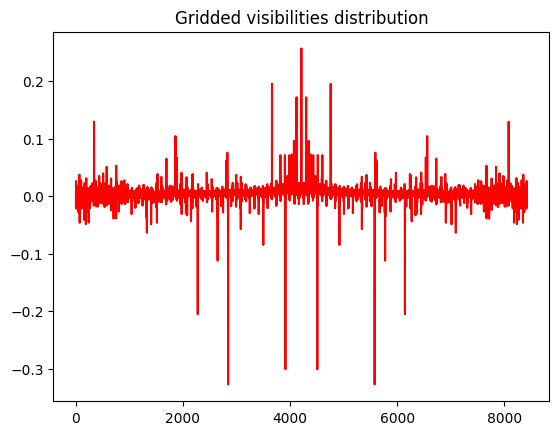

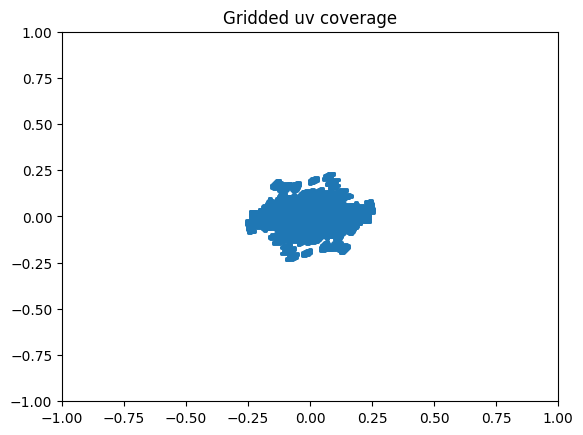

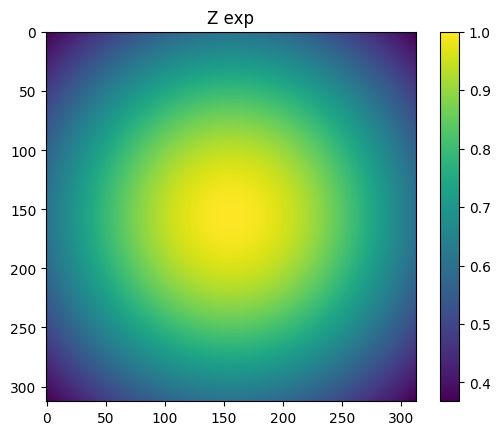

16
Max. polynomial degree: 15
Division: 0.09857146145074051
Sigma: 2618704726.509468
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 4.35 segundos


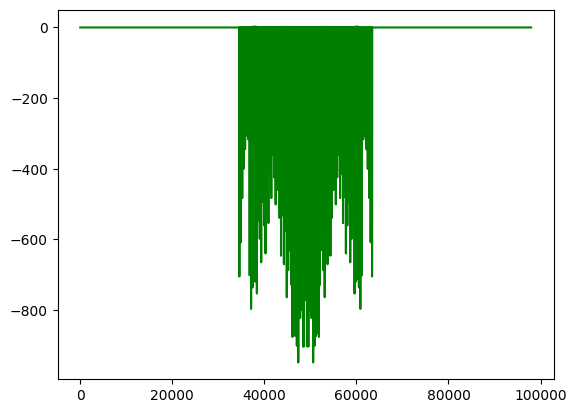

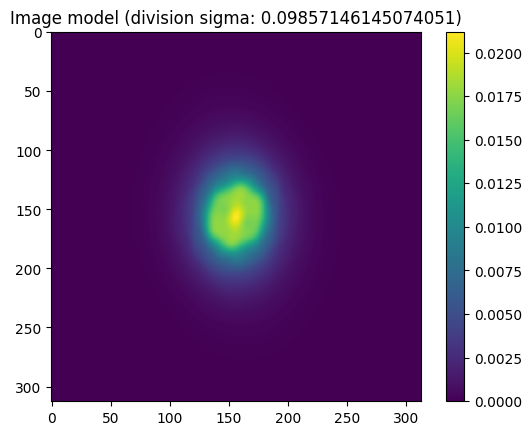

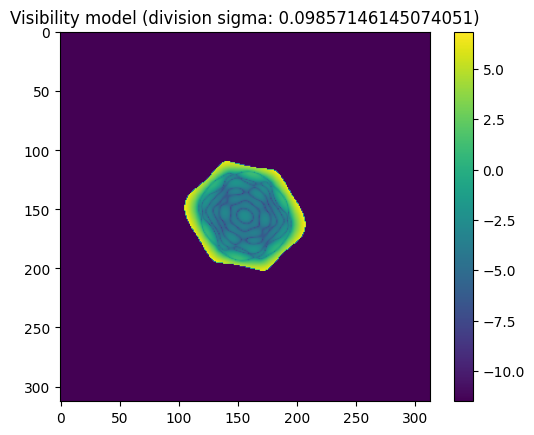

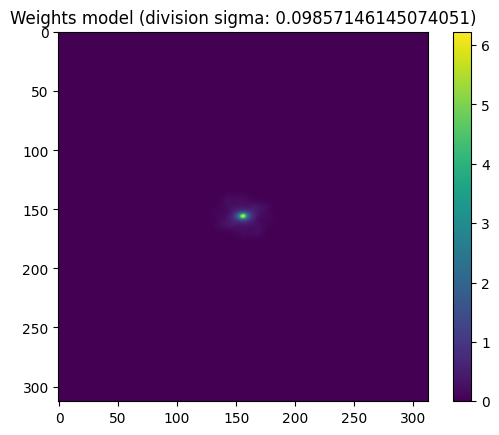

In [13]:
dirty_image, vis, weights, _, _ = ejemplo1_gwlup_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

MAX FINAL: (7.367623289559333e-05+4.152233866458531e-12j)
MIN FINAL: (-0.02027560636205239+0.00025959266071016833j)


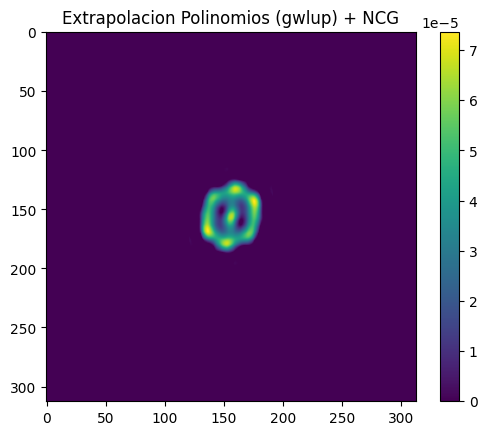

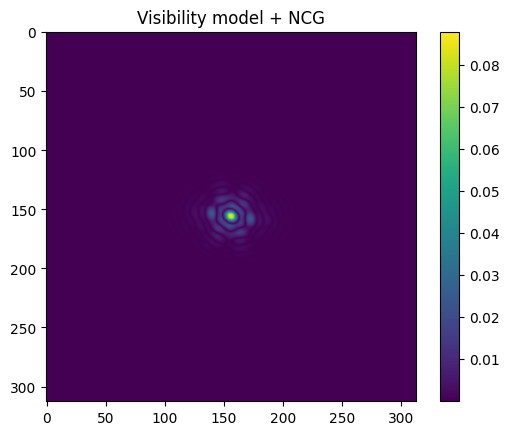

In [15]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion Polinomios (gwlup) + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

visbilidades dim. MS:  (253414, 8, 2)
visibilidades gridd. MS:  (253414,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 50
Division: 1e-05
Sigma: 213430322.26562497
Polinomios inicializados.
Polinomios normalizados.


OutOfMemoryError: Out of memory allocating 10,136,560,128 bytes (allocated so far: 12,667,257,344 bytes).

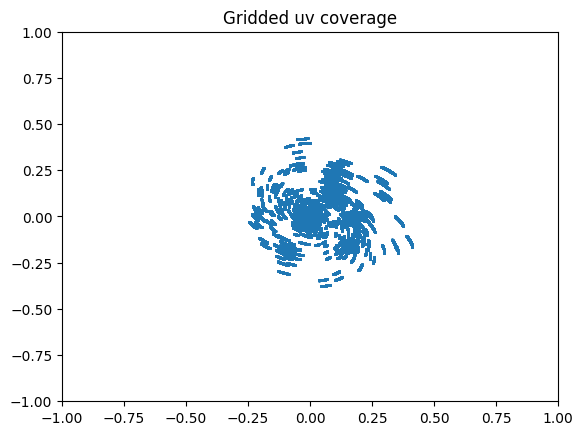

In [50]:
ejemplo1_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms", 
	50, 
    10**(-5),
    -1.7e-05,
    251,
    verbose = False,
    plots = True
)

dirty_image, vis, weights, _, _ = ejemplo1_dc.data_processing()

MAX FINAL: (1.0239460368865087e-06+6.972703094238504e-09j)
MIN FINAL: (-6.138555936001012e-05+0.00026834967022972006j)


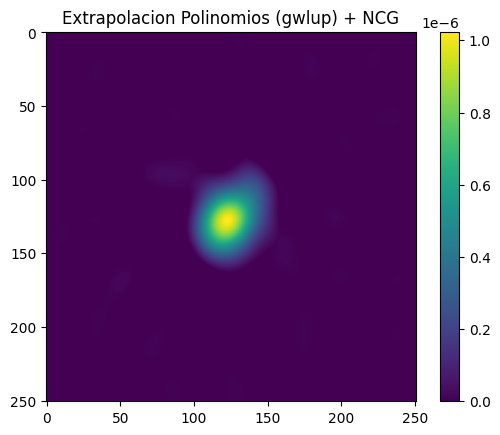

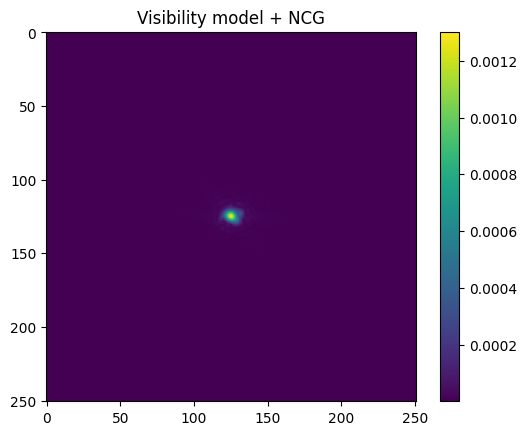

In [14]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion Polinomios (gwlup) + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

visbilidades dim. MS:  (15125, 1, 2)
visibilidades gridd. MS:  (15125,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 19
Division: 0.09783163540608564
Sigma: 7143.233010259968
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 6.74 segundos


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


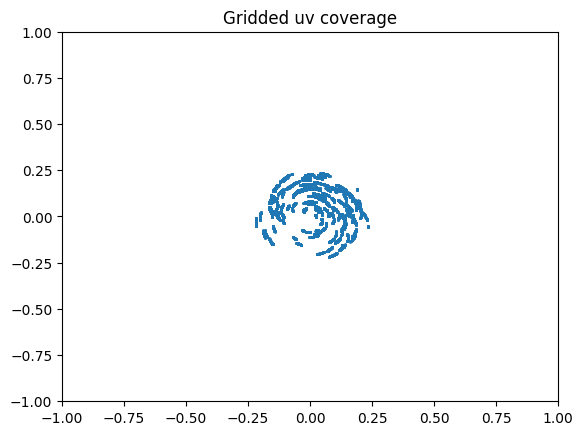

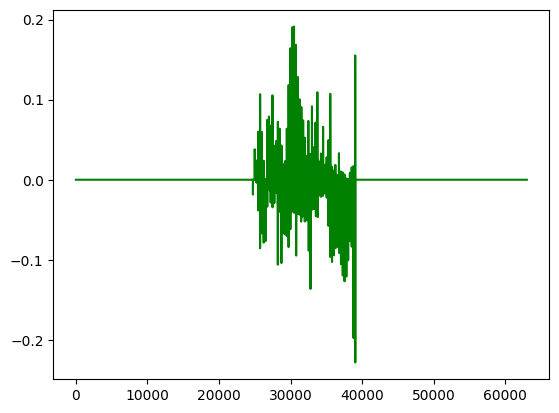

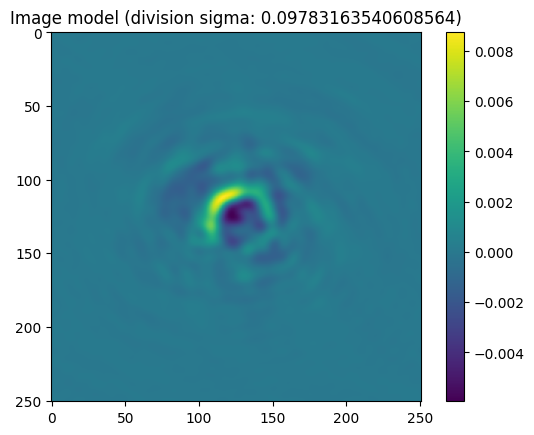

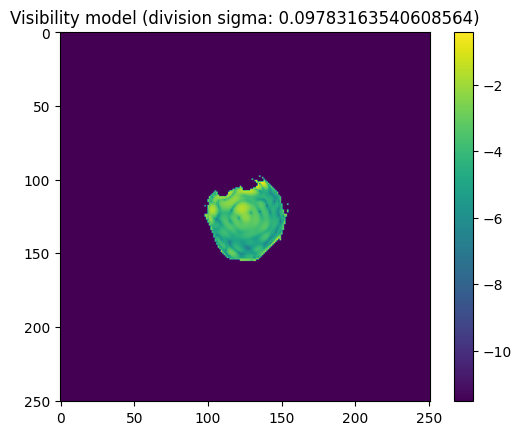

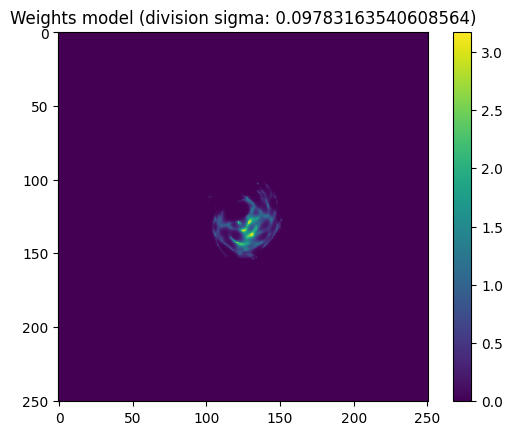

In [70]:
ejemplo_hd142_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms", 
    19, 
    0.09783163540608564, 
    0.601848830393431e-03, 
    251,
    verbose = False,
    plots = True)

dirty_image_dc, visibilidades_dc, pesos_dc, u_data_dc, v_data_dc = ejemplo_hd142_dc.data_processing()

In [15]:
print("visibilities: ", visibilidades_dc.shape)

print("dirty image: ",dirty_image_dc.shape)

print("weights: ", pesos_dc.shape)

print("u coords: ", u_data_dc.shape)

print("v coords: ", v_data_dc.shape)
      

visibilities:  (251, 251)
dirty image:  (251, 251)
weights:  (251, 251)
u coords:  (15125,)
v coords:  (15125,)


In [4]:
print(pesos_dc)

[[2.84146380e-24 3.11237481e-24 3.40863488e-24 ... 8.86312470e-24
  7.96062475e-24 7.15158905e-24]
 [3.14487681e-24 3.44768363e-24 3.77912347e-24 ... 9.69367521e-24
  8.70082476e-24 7.81143528e-24]
 [3.48063962e-24 3.81910759e-24 4.18992100e-24 ... 1.06030576e-23
  9.51071829e-24 8.53291308e-24]
 ...
 [7.97608292e-24 8.91969331e-24 9.97769674e-24 ... 7.83263375e-24
  7.08675826e-24 6.41175231e-24]
 [7.33015556e-24 8.19183706e-24 9.15727323e-24 ... 7.07986538e-24
  6.41137010e-24 5.80582761e-24]
 [6.73660953e-24 7.52348197e-24 8.40445972e-24 ... 6.39919748e-24
  5.80006312e-24 5.25685037e-24]]


In [5]:
print(u_data_dc)

[  46.69929199   46.69928773  119.07919522 ...  -14.62868347 -112.27899533
  139.15162343]


In [6]:
print(v_data_dc)

[-160.47567874 -160.47567874  -30.99829882 ...   63.89080259   83.9271034
   26.81879913]


In [2]:
ejemplo_opti_dc_1 = optimizacion_parametros_continuos.OptimizacionParametrosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/FREQ78/mod_in_0.fits",
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/FREQ78/FREQ78.ms",   
	[5, 16],
	[1e-4, 1e-1],
	-1.38 * (10 ** (-7/2)),
	None)

ejemplo_opti_dc_1.initialize_optimization(50)

[I 2025-02-21 00:47:48,998] A new study created in memory with name: no-name-56e26105-d3e5-43f4-9793-33d0c69d8bc2


Image size of FITS:  512
New S: 13
Division: 0.041107593021724016
Sigma: 10390.226880758031


[I 2025-02-21 00:47:56,955] Trial 0 finished with value: 105.12127685546875 and parameters: {'S': 13, 'division': 0.041107593021724016}. Best is trial 0 with value: 105.12127685546875.


El tiempo de ejecución fue de:  7.115442752838135
New S: 6
Division: 0.09960181218948495
Sigma: 4288.24745884161


[I 2025-02-21 00:47:57,810] Trial 1 finished with value: 98.89764404296875 and parameters: {'S': 6, 'division': 0.09960181218948495}. Best is trial 1 with value: 98.89764404296875.


El tiempo de ejecución fue de:  0.5547776222229004
New S: 11
Division: 0.00965391785450602
Sigma: 44242.88920360129


[I 2025-02-21 00:48:01,678] Trial 2 finished with value: 102.19354248046875 and parameters: {'S': 11, 'division': 0.00965391785450602}. Best is trial 1 with value: 98.89764404296875.


El tiempo de ejecución fue de:  3.567152738571167
New S: 12
Division: 0.0718657483138392
Sigma: 5943.265436440576


[I 2025-02-21 00:48:06,732] Trial 3 finished with value: 106.38983154296875 and parameters: {'S': 12, 'division': 0.0718657483138392}. Best is trial 1 with value: 98.89764404296875.


El tiempo de ejecución fue de:  4.74030613899231
New S: 6
Division: 0.033521215413908186
Sigma: 12741.698436160052


[I 2025-02-21 00:48:07,638] Trial 4 finished with value: 98.42840576171875 and parameters: {'S': 6, 'division': 0.033521215413908186}. Best is trial 4 with value: 98.42840576171875.


El tiempo de ejecución fue de:  0.5876986980438232
New S: 13
Division: 0.05748161158359659
Sigma: 7430.501794411479


[I 2025-02-21 00:48:14,922] Trial 5 finished with value: 105.11541748046875 and parameters: {'S': 13, 'division': 0.05748161158359659}. Best is trial 4 with value: 98.42840576171875.


El tiempo de ejecución fue de:  6.962236166000366
New S: 6
Division: 0.05500722790255988
Sigma: 7764.747185118582


[I 2025-02-21 00:48:15,778] Trial 6 finished with value: 98.27655029296875 and parameters: {'S': 6, 'division': 0.05500722790255988}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.564598798751831
New S: 7
Division: 0.09056663134468078
Sigma: 4716.05503788746


[I 2025-02-21 00:48:16,970] Trial 7 finished with value: 99.90985107421875 and parameters: {'S': 7, 'division': 0.09056663134468078}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.8888046741485596
New S: 6
Division: 0.07558570986192228
Sigma: 5650.766775860451


[I 2025-02-21 00:48:17,827] Trial 8 finished with value: 98.33026123046875 and parameters: {'S': 6, 'division': 0.07558570986192228}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5630936622619629
New S: 9
Division: 0.05941904669345536
Sigma: 7188.220642803118


[I 2025-02-21 00:48:19,995] Trial 9 finished with value: 101.25701904296875 and parameters: {'S': 9, 'division': 0.05941904669345536}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.8707475662231445
New S: 16
Division: 0.02143199104300455
Sigma: 19928.956537940983


[I 2025-02-21 00:48:32,179] Trial 10 finished with value: 106.47869873046875 and parameters: {'S': 16, 'division': 0.02143199104300455}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  11.86621642112732
New S: 8
Division: 0.07673540483374625
Sigma: 5566.103664181661


[I 2025-02-21 00:48:33,801] Trial 11 finished with value: 107.32684326171875 and parameters: {'S': 8, 'division': 0.07673540483374625}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.2738356590270996
New S: 5
Division: 0.07486388524110141
Sigma: 5705.250490834589


[I 2025-02-21 00:48:34,466] Trial 12 finished with value: 100.94354248046875 and parameters: {'S': 5, 'division': 0.07486388524110141}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.37674498558044434
New S: 9
Division: 0.05482459131963872
Sigma: 7790.613805534752


[I 2025-02-21 00:48:36,600] Trial 13 finished with value: 101.36785888671875 and parameters: {'S': 9, 'division': 0.05482459131963872}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.8297505378723145
New S: 5
Division: 0.04034629835286356
Sigma: 10586.280165829976


[I 2025-02-21 00:48:37,246] Trial 14 finished with value: 103.65301513671875 and parameters: {'S': 5, 'division': 0.04034629835286356}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.33730363845825195
New S: 8
Division: 0.06787235472640393
Sigma: 6292.948281215585


[I 2025-02-21 00:48:38,761] Trial 15 finished with value: 107.35760498046875 and parameters: {'S': 8, 'division': 0.06787235472640393}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.2270336151123047
New S: 10
Division: 0.08351351929629686
Sigma: 5114.348211122715


[I 2025-02-21 00:48:41,580] Trial 16 finished with value: 103.45379638671875 and parameters: {'S': 10, 'division': 0.08351351929629686}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  2.5082385540008545
New S: 7
Division: 0.04747128665787448
Sigma: 8997.380271063887


[I 2025-02-21 00:48:42,754] Trial 17 finished with value: 99.63690185546875 and parameters: {'S': 7, 'division': 0.04747128665787448}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.8704438209533691
New S: 16
Division: 0.027923943568697825
Sigma: 15295.734177616941


[I 2025-02-21 00:49:02,539] Trial 18 finished with value: 106.46795654296875 and parameters: {'S': 16, 'division': 0.027923943568697825}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  19.453094720840454
New S: 5
Division: 0.06412246551924874
Sigma: 6660.960625248619


[I 2025-02-21 00:49:03,282] Trial 19 finished with value: 102.46160888671875 and parameters: {'S': 5, 'division': 0.06412246551924874}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.43703675270080566
New S: 7
Division: 0.0873619768407018
Sigma: 4889.051661415529


[I 2025-02-21 00:49:04,808] Trial 20 finished with value: 99.96307373046875 and parameters: {'S': 7, 'division': 0.0873619768407018}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.189424991607666
New S: 6
Division: 0.028711820448670315
Sigma: 14876.00616551496


[I 2025-02-21 00:49:05,851] Trial 21 finished with value: 98.69256591796875 and parameters: {'S': 6, 'division': 0.028711820448670315}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.7205650806427002
New S: 6
Division: 0.04574444293632432
Sigma: 9337.029606243535


[I 2025-02-21 00:49:06,886] Trial 22 finished with value: 98.27947998046875 and parameters: {'S': 6, 'division': 0.04574444293632432}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.7018246650695801
New S: 9
Division: 0.04413124894304046
Sigma: 9678.339685533303


[I 2025-02-21 00:49:09,115] Trial 23 finished with value: 101.51776123046875 and parameters: {'S': 9, 'division': 0.04413124894304046}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.9226596355438232
New S: 8
Division: 0.05383881635910889
Sigma: 7933.257952193351


[I 2025-02-21 00:49:10,718] Trial 24 finished with value: 107.42889404296875 and parameters: {'S': 8, 'division': 0.05383881635910889}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.2792069911956787
New S: 6
Division: 0.013353947549236994
Sigma: 31984.341442316236


[I 2025-02-21 00:49:11,539] Trial 25 finished with value: 99.44940185546875 and parameters: {'S': 6, 'division': 0.013353947549236994}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5205996036529541
New S: 7
Division: 0.07904561485523144
Sigma: 5403.427107244652


[I 2025-02-21 00:49:12,735] Trial 26 finished with value: 99.87469482421875 and parameters: {'S': 7, 'division': 0.07904561485523144}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.9042961597442627
New S: 5
Division: 0.06303845939049606
Sigma: 6775.502164032456


[I 2025-02-21 00:49:13,357] Trial 27 finished with value: 102.38983154296875 and parameters: {'S': 5, 'division': 0.06303845939049606}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.3280754089355469
New S: 10
Division: 0.04933702451314173
Sigma: 8657.133709062824


[I 2025-02-21 00:49:16,200] Trial 28 finished with value: 103.52069091796875 and parameters: {'S': 10, 'division': 0.04933702451314173}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  2.5422523021698
New S: 14
Division: 0.04110588273363214
Sigma: 10390.659185823008


[I 2025-02-21 00:49:25,278] Trial 29 finished with value: 108.36151123046875 and parameters: {'S': 14, 'division': 0.04110588273363214}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  8.772029638290405
New S: 8
Division: 0.036186715444042256
Sigma: 11803.149658002418


[I 2025-02-21 00:49:26,843] Trial 30 finished with value: 107.43621826171875 and parameters: {'S': 8, 'division': 0.036186715444042256}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.259582757949829
New S: 6
Division: 0.03403362467436323
Sigma: 12549.859796136143


[I 2025-02-21 00:49:27,687] Trial 31 finished with value: 98.34979248046875 and parameters: {'S': 6, 'division': 0.03403362467436323}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5483174324035645
New S: 6
Division: 0.023543886065112762
Sigma: 18141.32199061559


[I 2025-02-21 00:49:28,583] Trial 32 finished with value: 98.76922607421875 and parameters: {'S': 6, 'division': 0.023543886065112762}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5788719654083252
New S: 7
Division: 0.0013472333352878285
Sigma: 317032.84563273296


[I 2025-02-21 00:49:29,833] Trial 33 finished with value: 99.45135498046875 and parameters: {'S': 7, 'division': 0.0013472333352878285}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.9383716583251953
New S: 6
Division: 0.09277956580615601
Sigma: 4603.569916569263


[I 2025-02-21 00:49:30,810] Trial 34 finished with value: 98.73455810546875 and parameters: {'S': 6, 'division': 0.09277956580615601}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.664517879486084
New S: 5
Division: 0.09711982695299798
Sigma: 4397.837510813167


[I 2025-02-21 00:49:31,504] Trial 35 finished with value: 99.79119873046875 and parameters: {'S': 5, 'division': 0.09711982695299798}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.39418888092041016
New S: 6
Division: 0.03525958891806413
Sigma: 12113.505322200685


[I 2025-02-21 00:49:32,461] Trial 36 finished with value: 98.29168701171875 and parameters: {'S': 6, 'division': 0.03525958891806413}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.6528098583221436
New S: 11
Division: 0.06819961653212156
Sigma: 6262.7510202554995


[I 2025-02-21 00:49:36,437] Trial 37 finished with value: 101.92938232421875 and parameters: {'S': 11, 'division': 0.06819961653212156}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  3.673021078109741
New S: 7
Division: 0.047346177449969974
Sigma: 9021.155265784799


[I 2025-02-21 00:49:37,620] Trial 38 finished with value: 99.63641357421875 and parameters: {'S': 7, 'division': 0.047346177449969974}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.8812611103057861
New S: 5
Division: 0.016747381360553072
Sigma: 25503.522540163427


[I 2025-02-21 00:49:38,265] Trial 39 finished with value: 103.40496826171875 and parameters: {'S': 5, 'division': 0.016747381360553072}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.34116578102111816
New S: 6
Division: 0.06060541922259939
Sigma: 7047.508679855954


[I 2025-02-21 00:49:39,373] Trial 40 finished with value: 98.26287841796875 and parameters: {'S': 6, 'division': 0.06060541922259939}. Best is trial 40 with value: 98.26287841796875.


El tiempo de ejecución fue de:  0.608543872833252
New S: 6
Division: 0.05305580103038893
Sigma: 8050.339637185704


[I 2025-02-21 00:49:40,249] Trial 41 finished with value: 98.27020263671875 and parameters: {'S': 6, 'division': 0.05305580103038893}. Best is trial 40 with value: 98.26287841796875.


El tiempo de ejecución fue de:  0.5777337551116943
New S: 7
Division: 0.05217259022966754
Sigma: 8186.620908361595


[I 2025-02-21 00:49:41,542] Trial 42 finished with value: 99.66912841796875 and parameters: {'S': 7, 'division': 0.05217259022966754}. Best is trial 40 with value: 98.26287841796875.


El tiempo de ejecución fue de:  0.9953689575195312
New S: 6
Division: 0.05972484630085706
Sigma: 7151.415942805849


[I 2025-02-21 00:49:42,453] Trial 43 finished with value: 98.20526123046875 and parameters: {'S': 6, 'division': 0.05972484630085706}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.5778770446777344
New S: 8
Division: 0.05817325801371897
Sigma: 7342.157420800659


[I 2025-02-21 00:49:44,159] Trial 44 finished with value: 107.39666748046875 and parameters: {'S': 8, 'division': 0.05817325801371897}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  1.3689546585083008
New S: 13
Division: 0.060322443473116306
Sigma: 7080.56891309335


[I 2025-02-21 00:49:52,317] Trial 45 finished with value: 105.12567138671875 and parameters: {'S': 13, 'division': 0.060322443473116306}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  7.840154409408569
New S: 6
Division: 0.0677812730054184
Sigma: 6301.40448945883


[I 2025-02-21 00:49:53,265] Trial 46 finished with value: 98.26727294921875 and parameters: {'S': 6, 'division': 0.0677812730054184}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.5983970165252686
New S: 5
Division: 0.06737851267374502
Sigma: 6339.071627860529


[I 2025-02-21 00:49:53,914] Trial 47 finished with value: 101.22528076171875 and parameters: {'S': 5, 'division': 0.06737851267374502}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.34150147438049316
New S: 12
Division: 0.07073302693262604
Sigma: 6038.441114988785


[I 2025-02-21 00:49:58,801] Trial 48 finished with value: 106.39373779296875 and parameters: {'S': 12, 'division': 0.07073302693262604}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  4.577289342880249
New S: 7
Division: 0.05509474158734441
Sigma: 7752.413491956363


[I 2025-02-21 00:49:59,971] Trial 49 finished with value: 99.73065185546875 and parameters: {'S': 7, 'division': 0.05509474158734441}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.8643739223480225
Mejores parámetros: {'S': 6, 'division': 0.05972484630085706}
Mejor valor (BRISQUE): 98.20526123046875


In [6]:
ejemplo_dc_doar25 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/M87/M87_original_lowfreq.fits",
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/M87/SR1_M87_2017_101_hilo_hops_netcal_StokesI.selfcal.final.ms", 
    10, 
    0.05972484630085706, 
    -5.5555555555555e-10, 
    None)

Pixel size of FITS:  -5.5555555555555e-10
Image size of FITS:  64


New S: 10
Division: 0.05972484630085706
Sigma: 712584.8313926808
El tiempo de ejecución fue de:  0.48537516593933105


/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


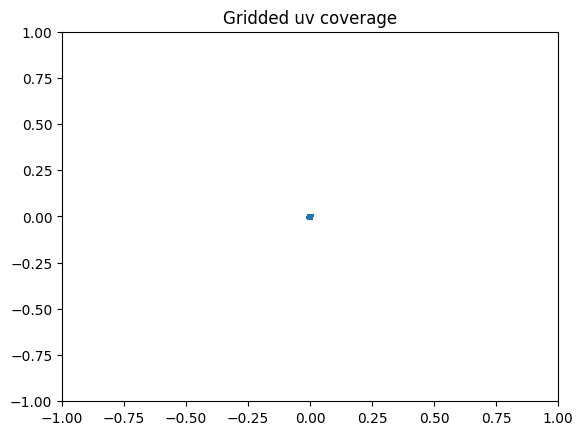

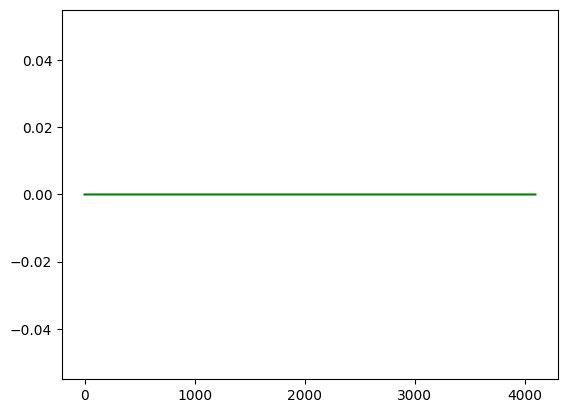

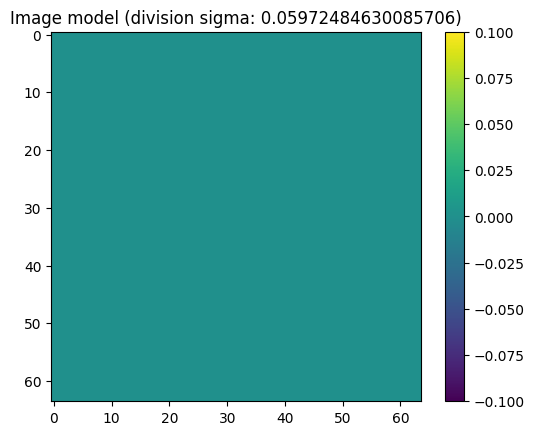

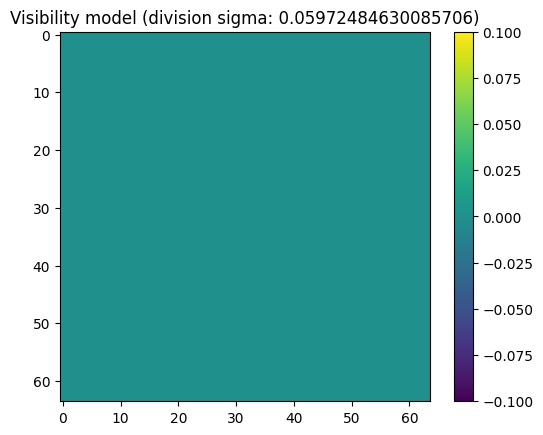

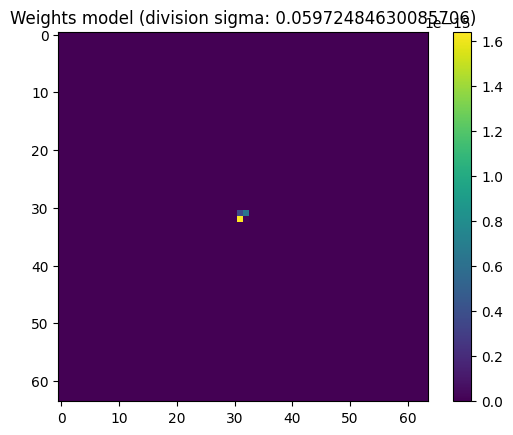

In [7]:
visibilidades_extrapoladas_dc_doar25, pesos_dc_doar25 = ejemplo_dc_doar25.data_processing()

In [5]:
print(visibilidades_extrapoladas_dc)

[[ 5.82871343e-06  8.37353557e-06  9.73375520e-06 ... -4.88806933e-06
  -1.24466260e-06  2.47786892e-06]
 [-2.04531230e-06  1.89811040e-06  5.61649931e-06 ... -1.00851297e-05
  -8.39974643e-06 -5.62744405e-06]
 [-9.04723138e-06 -5.80981801e-06 -1.64608647e-06 ... -9.73726689e-06
  -1.10452385e-05 -1.08550013e-05]
 ...
 [ 3.16961451e-06 -7.36808679e-07 -4.60738119e-06 ...  1.03321169e-05
   9.11104412e-06  6.60480599e-06]
 [ 9.23826741e-06  6.40757446e-06  2.61061549e-06 ...  9.11942238e-06
   1.06960219e-05  1.07343907e-05]
 [ 1.03761962e-05  1.01674205e-05  8.48671789e-06 ...  2.94620721e-06
   6.51799355e-06  9.10435530e-06]]


In [6]:
print(pesos_dc)

[[6.27948719e-20 6.74364723e-20 7.24185639e-20 ... 1.51318263e-19
  1.38753544e-19 1.27255478e-19]
 [6.86480122e-20 7.37670118e-20 7.92649381e-20 ... 1.63448017e-19
  1.49797232e-19 1.37312386e-19]
 [7.50566372e-20 8.07032277e-20 8.67716280e-20 ... 1.76572213e-19
  1.61739562e-19 1.48181532e-19]
 ...
 [1.44705673e-19 1.58431285e-19 1.73495253e-19 ... 1.56550336e-19
  1.44776660e-19 1.33888676e-19]
 [1.34538176e-19 1.47217237e-19 1.61124218e-19 ... 1.43113007e-19
  1.32439146e-19 1.22561468e-19]
 [1.25088933e-19 1.36801736e-19 1.49641196e-19 ... 1.30840096e-19
  1.21161951e-19 1.12199673e-19]]


## Ejemplo de optimización de parametros para datos grillados previamente:

In [ ]:
ejemplo_opti_gc = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits",
    "/home/stephan/polynomial_preprocessing/datasets/HD142/hd142_b9cont_self_tav.ms", 
	[7, 21],
	[1e-3, 1e-1],
	2.5e-07, 
    129)

ejemplo_opti_gc.initialize_optimization(77)

In [ ]:
ejemplo_opti_gc = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/DoAr25/imagen_recortada.fits",
    "/home/stephan/polynomial_preprocessing/datasets/DoAr25/DoAr25_continuum.ms",
	[7, 20],
	[1e-4, 1e-1],
	-4e-08, 
    129)

ejemplo_opti_gc.initialize_optimization(77)

## Ejemplo de procesamiento de datos grillados:

1.0512941812754017e-06 rad
1.501848830393431e-07 rad


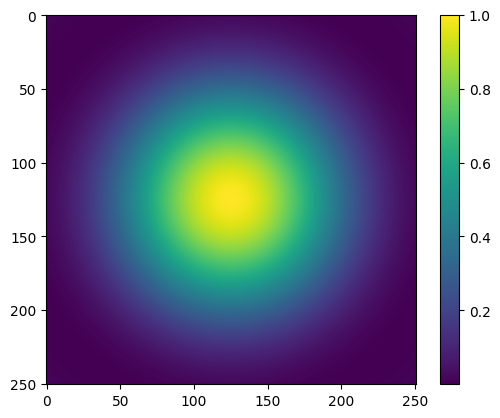

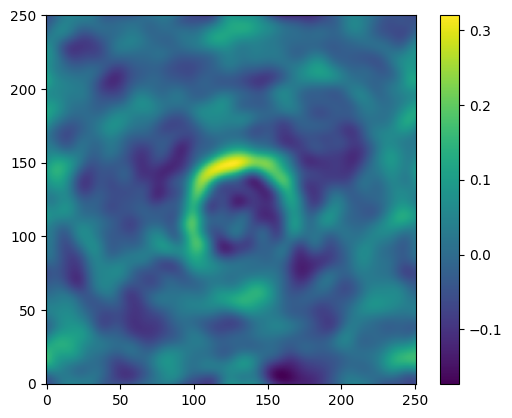

dx a entregar:  1.501848830393431e-07 rad


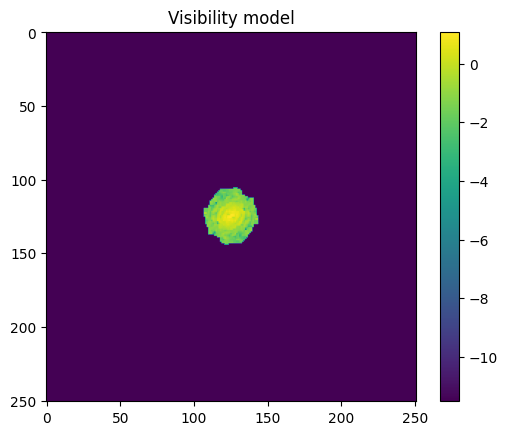

gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (0.003943260539577442+6.505213034913027e-19j)
MIN FINAL: (-1.870934850703884-0.04351756614479685j)


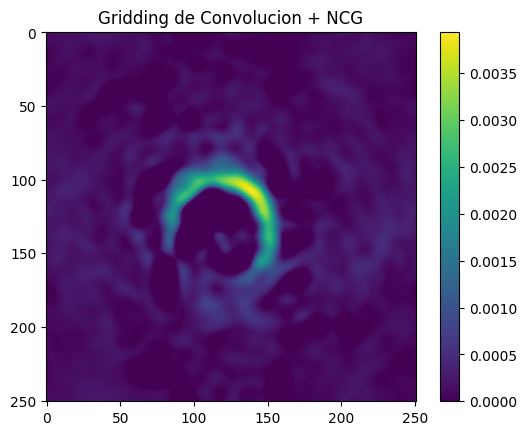

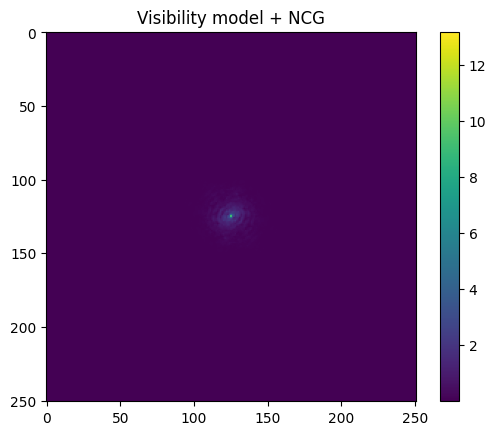

In [58]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/dirty_images_natural_251.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms",
    image_size = 251,
    plots = True
)

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(gridded_visibilities_2d) + 0.00001))
plt.colorbar(im)

plt.show()

gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [40]:
ejemplo1_hd142_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/dirty_images_natural_251.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms", 
    45, 
    0.0750780409680797,
    1.501848830393431e-07,
    251,
    verbose = False,
    plots = True
)

self.pixel_size:  1.501848830393431e-07
self.image_size:  251
1.0512941812754017e-06 rad
1.501848830393431e-07 rad


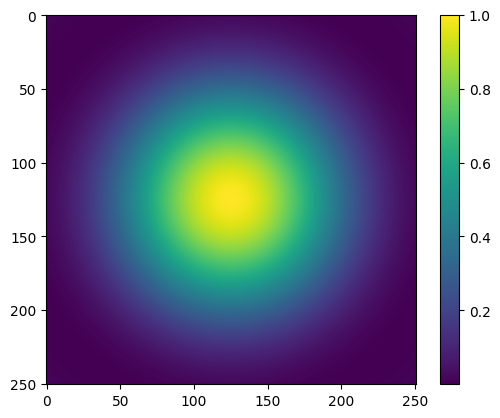

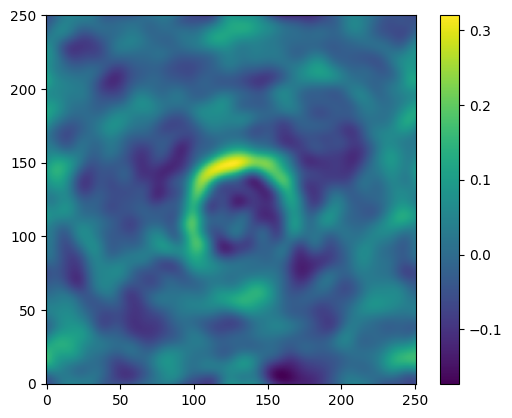

dx a entregar:  1.501848830393431e-07 rad


In [37]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_hd142_grid.grid_data()

gw_sparse.shape:  (1043,)
u_sparse:  (1043,)
v_sparse:  (1043,)
z_sparse.shape:  (1043,)


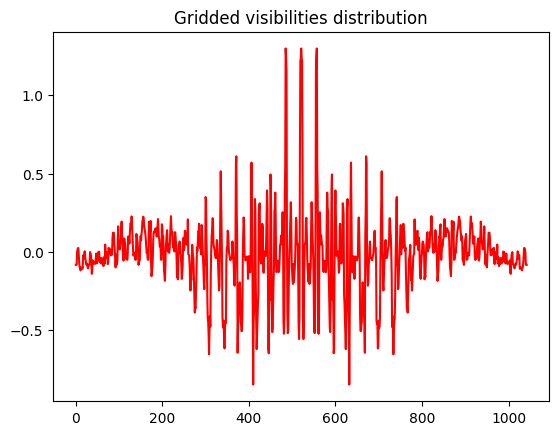

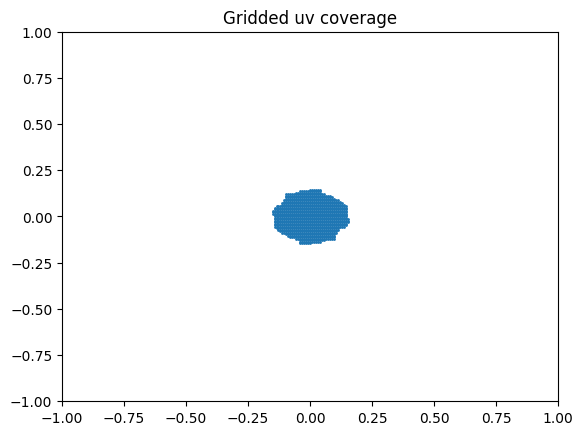

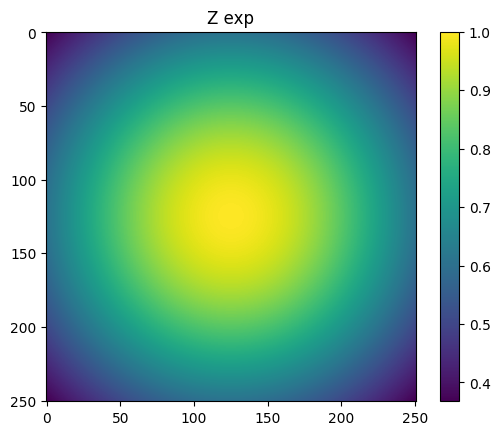

32
Max. polynomial degree: 45
Division: 0.0750780409680797
Sigma: 3158171.6929829028
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 129.51 segundos


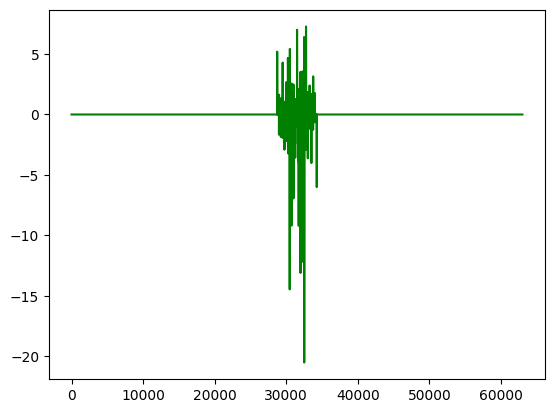

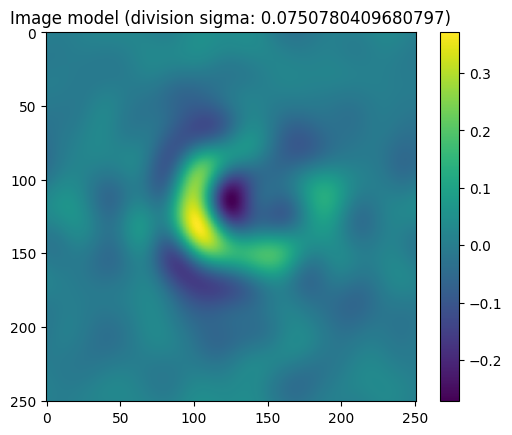

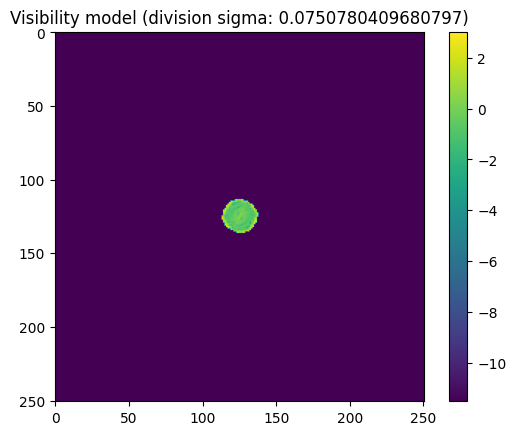

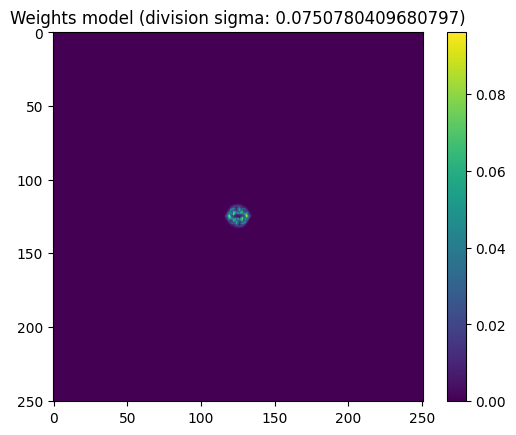

In [41]:
dirty_image, vis, weights, _, _ = ejemplo1_hd142_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

MAX FINAL: (0.0013767575830193725+1.2679209091421293e-06j)
MIN FINAL: (-0.8107373471427962+0.003159509767023977j)


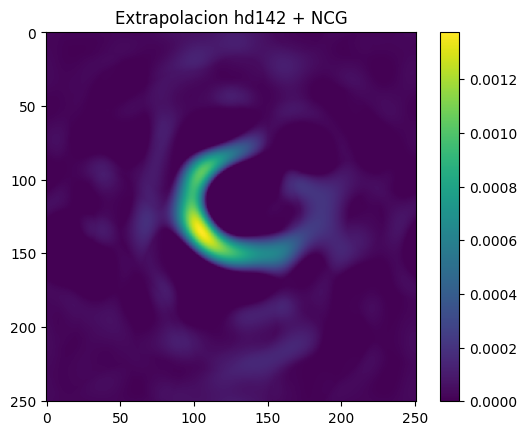

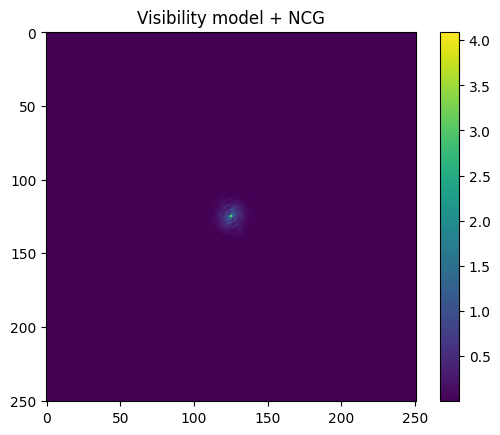

In [42]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion hd142 + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

visbilidades dim. MS:  (78779, 1, 2)
visibilidades gridd. MS:  (78779,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 20
Division: 1e-07
Sigma: 4271172180.1757812
Polinomios inicializados.
Polinomios normalizados.


KeyboardInterrupt: 

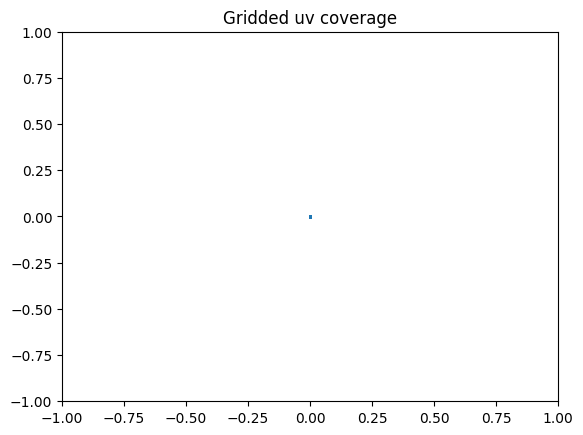

In [73]:
ejemplo_freq78_dg_2 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78_p0.04_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78.ms", 
	20, 
    10**(-7),
    5.555555555556e-07,
    251,
    verbose=False,
    plots=True
)

dirty_image, vis, weights, _, _ = ejemplo_freq78_dg_2.data_processing()

In [ ]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo_freq78_dg_2.grid_data()

visbilidades dim. MS:  (78779, 1, 2)
visibilidades gridd. MS:  (78779,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 25
Division: 0.001
Sigma: 427117.2180175781
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 26.74 segundos


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


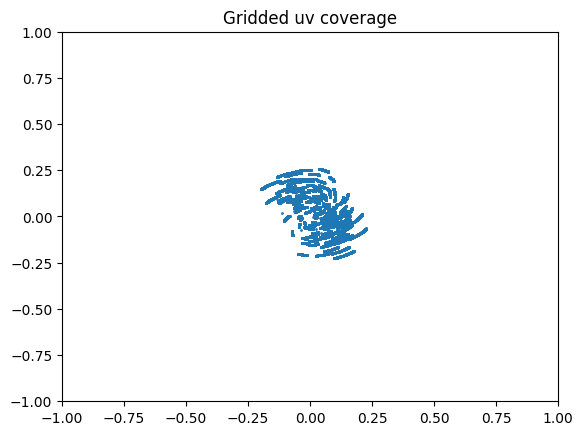

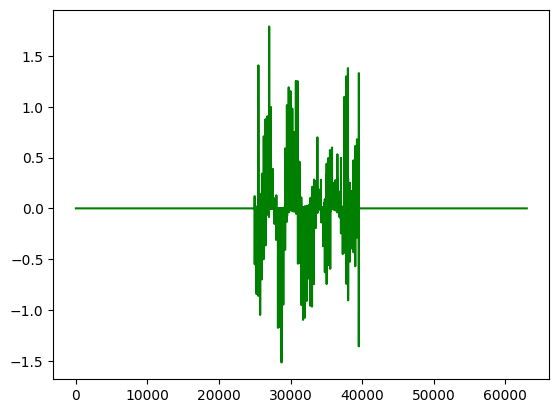

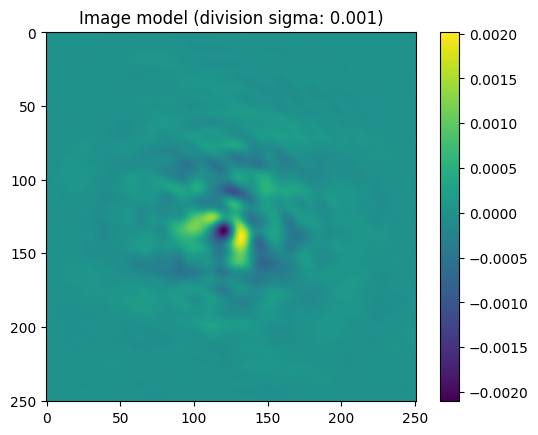

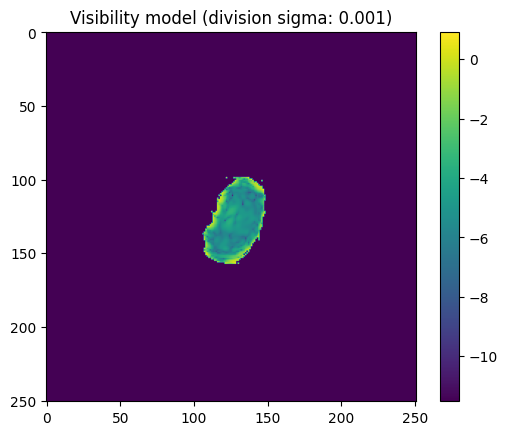

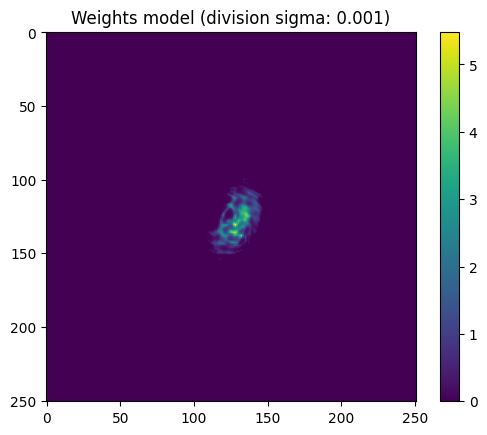

In [104]:
ejemplo_freq78_dc_2 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78_p0.04_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78.ms", 
	25, 
    1e-3,
    3.455555555556e-04,
    image_size = 251,
    verbose=False,
    plots=True
)

dirty_image, vis, weights, _, _ = ejemplo_freq78_dc_2.data_processing()

MAX FINAL: (3.323878103991308e-05+4.2666570087478826e-05j)
MIN FINAL: (-0.027116402071745937+0.00293012461577613j)


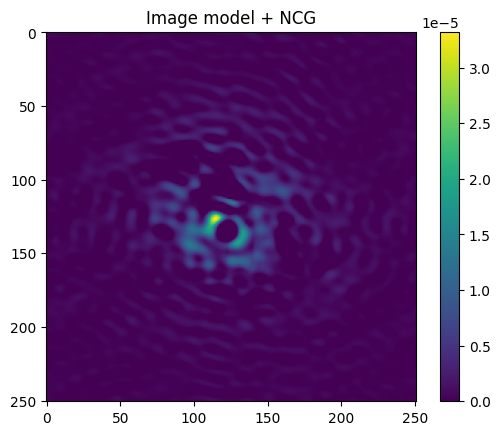

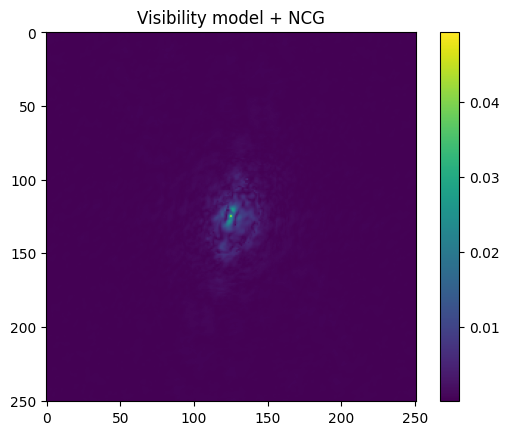

In [107]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Image model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

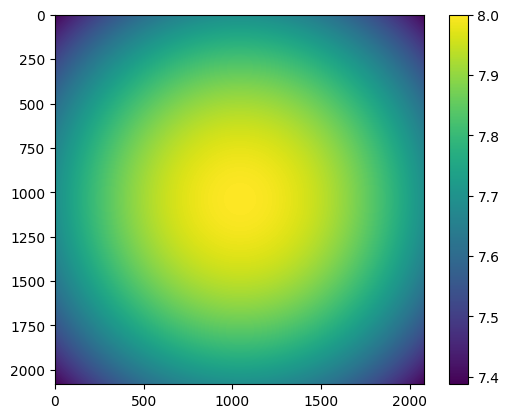

In [ ]:
visibilidades_grilladas_doar25, pesos_grillados_doar25 = ejemplo_dg_2.data_processing()

1.0640410139730754e-07 rad
1.5200585913901078e-08 rad


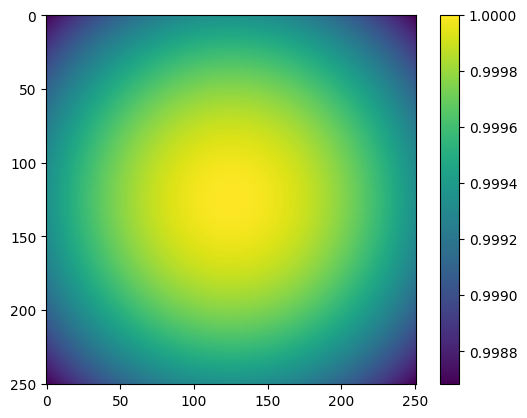

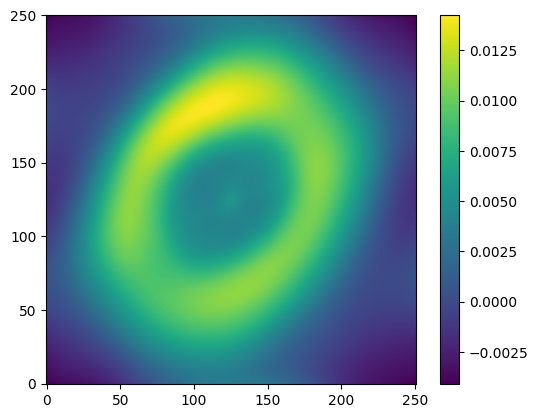

dx a entregar:  1.5200585913901078e-08 rad
gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (2.6700715447431935e-05+1.3234889800848443e-21j)
MIN FINAL: (-0.06022409406956331+0.006076861141810977j)


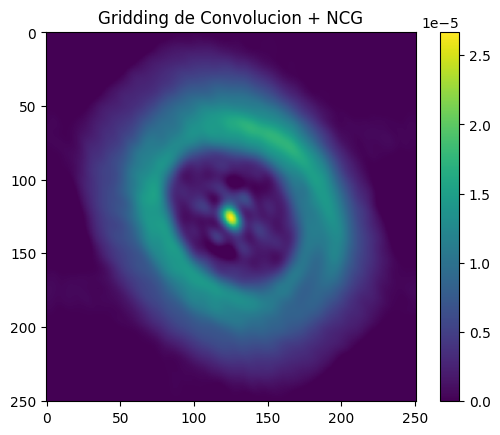

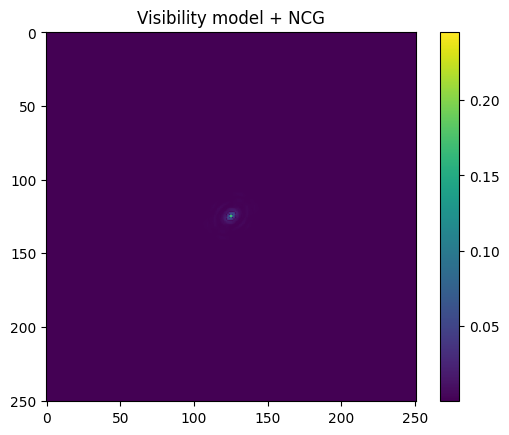

In [26]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms", 
    251
)

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [31]:
ejemplo1_hd100546_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms",  
	45, 
    0.6446652012699556,
    1.7200585913901078e-08,
    313,
    verbose = False,
    plots = True
)


self.pixel_size:  1.720058591390108e-08
self.image_size:  313
1.0640410139730754e-07 rad
1.5200585913901078e-08 rad


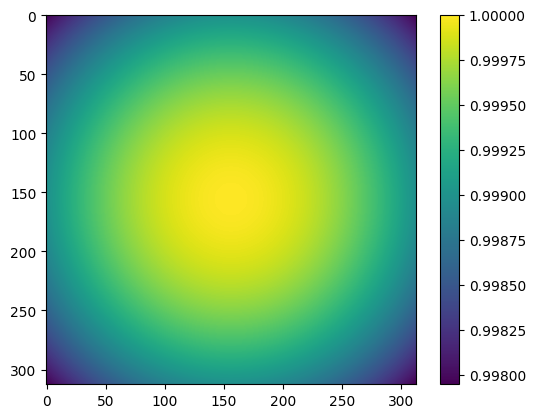

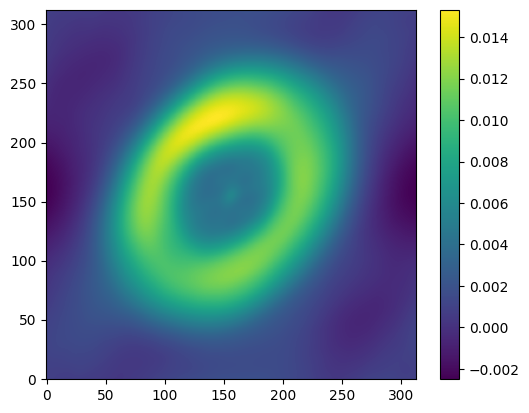

dx a entregar:  1.5200585913901078e-08 rad


In [24]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_hd100546_grid.grid_data()

gw_sparse.shape:  (3207,)
u_sparse:  (3207,)
v_sparse:  (3207,)
z_sparse.shape:  (3207,)


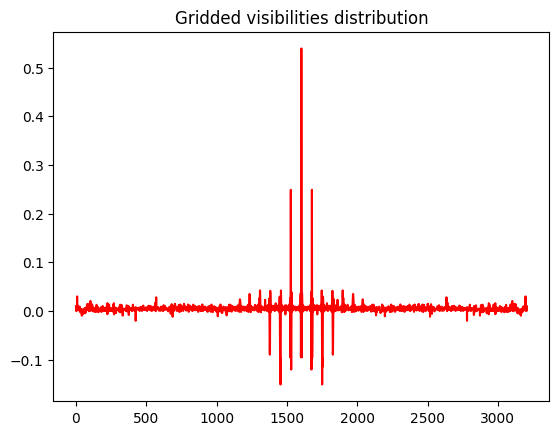

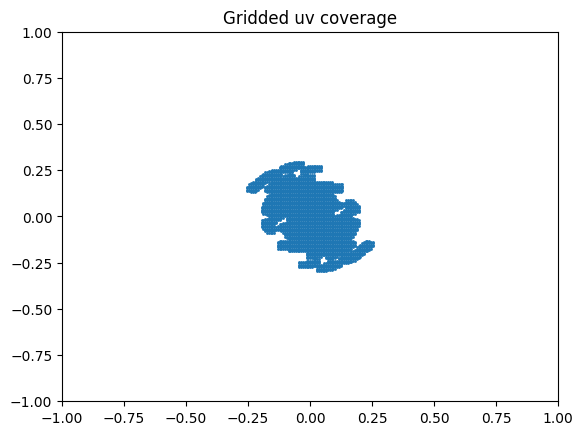

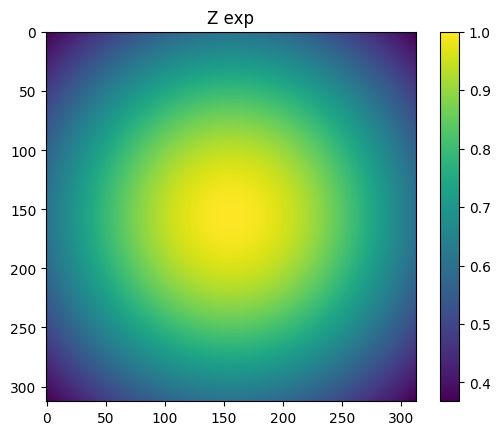

29
Max. polynomial degree: 40
Division: 0.6446652012699556
Sigma: 13742716.347256467
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 126.67 segundos


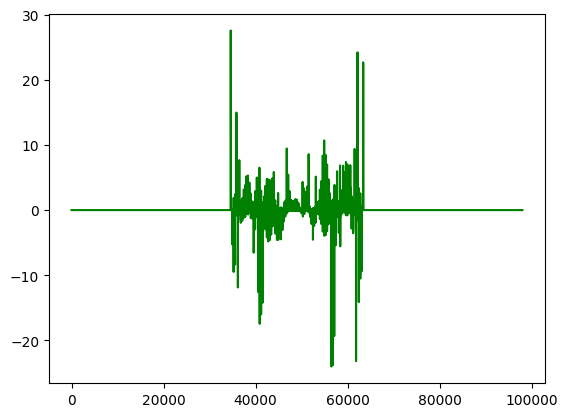

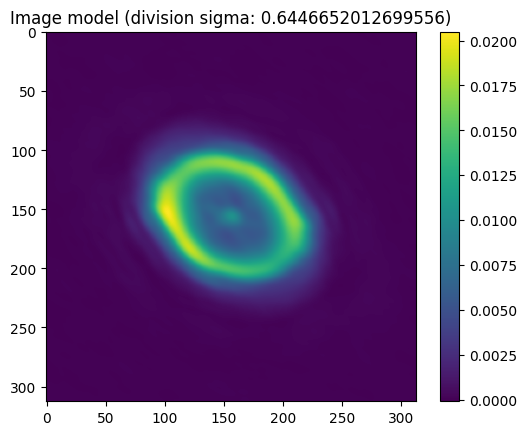

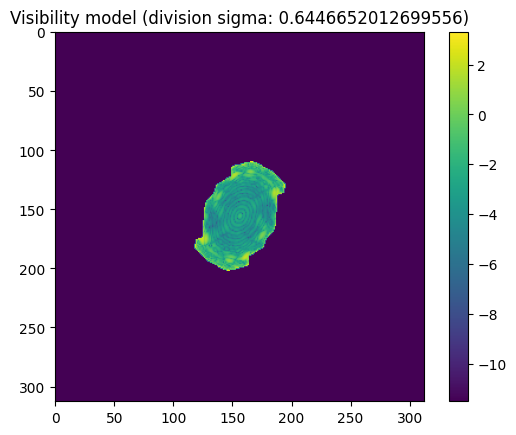

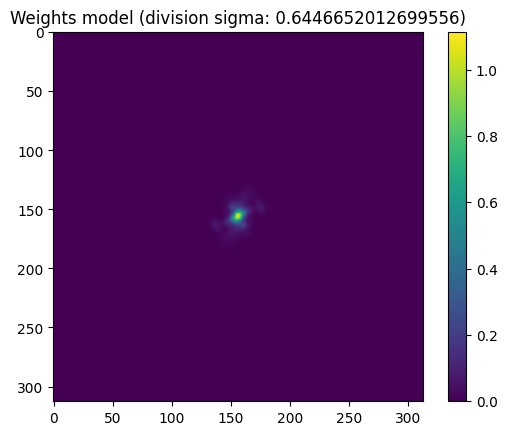

In [32]:
dirty_image, vis, weights, _, _ = ejemplo1_hd100546_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


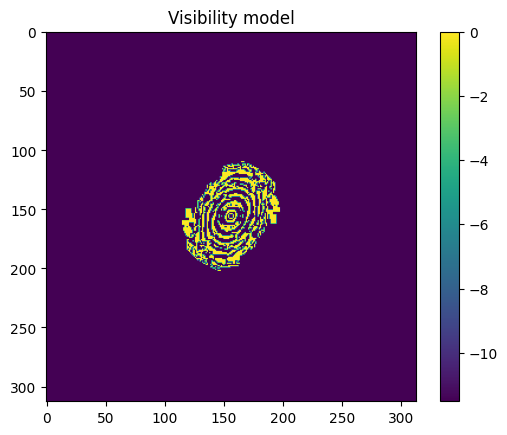

In [33]:

gridded_visibilities_2d = gridded_visibilities[0]
vis_orig_binario = (gridded_visibilities_2d > 0).astype(int)
vis_agregadas_binario = (vis > 0).astype(int)
vis_agregadas = vis_agregadas_binario - vis_orig_binario

print(vis_orig_binario)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(vis_agregadas) + 0.00001))
plt.colorbar(im)

plt.show()


MAX FINAL: (9.041731458813074e-05+1.222346898540638e-06j)
MIN FINAL: (-0.091588725475296-0.004410757428833203j)


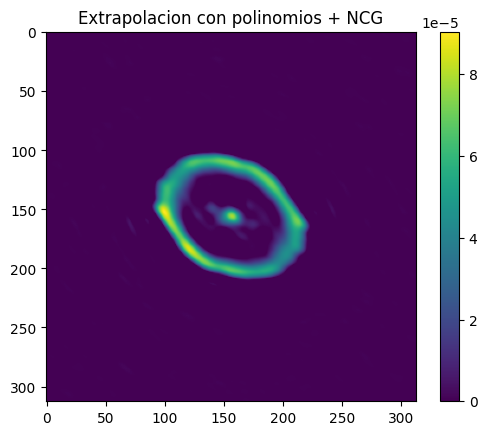

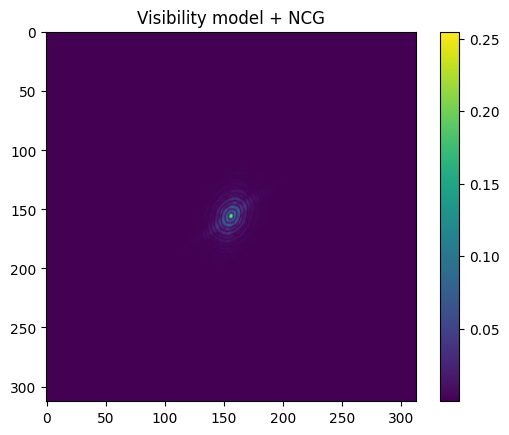

In [34]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_1 = conjugate_gradient.ConjugateGradient(vis, weights, 10)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))



title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

NpzFile '/disk2/stephan/gridded_visibility_model_natural_num_polynomial_19_division_sigma_0.0001_pixel_size_-3.88888888889e-09_image_size_513_513_HD100546.npz' with keys: arr_0


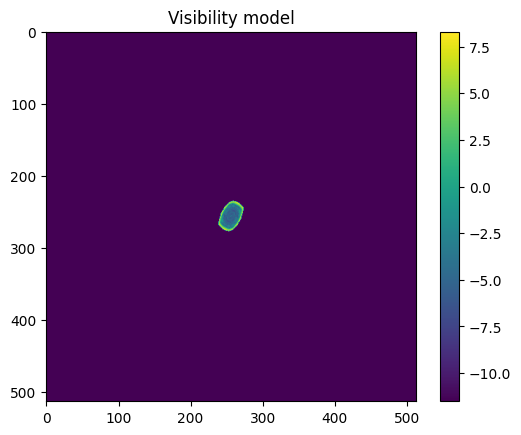

In [6]:
# Nombre de archivo a cargar
namefile_fulldata = "/disk2/stephan/gridded_visibility_model_natural_num_polynomial_19_division_sigma_0.0001_pixel_size_-3.88888888889e-09_image_size_513_513_HD100546.npz"

# Cargar archivo de entrada
full_data = np.load(namefile_fulldata)

visibilities = full_data["arr_0"]

print (full_data)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(visibilities) + 0.00001))
plt.colorbar(im)

plt.show()
